In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import truncnorm

# Leer DataSet

In [3]:
df = pd.read_csv("StudentsPerformance.csv")

In [4]:
df.shape

(1000, 8)

In [5]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


### Analisis de columnas y tipos de datos

In [6]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [41]:
df.columns = ['gender', 'race', 'parentEducation', 'lunch', 'testPreparation',
       'mathScore', 'readingScore', 'writingScore']

In [42]:
df.head(3)

,gender,race,parentEducation,lunch,testPreparation,mathScore,readingScore,writingScore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


Obtencion de las columnas categoricas y numericas en una lista separada

In [43]:
cat_cols = []
for c in df.columns:
    if df[c].dtype == 'object':
        cat_cols.append(c)

num_cols = []
for p in df.columns:
    if df[p].dtype == 'int64' or df[p].dtype == 'float64':
        num_cols.append(p)

In [44]:
cat_cols

['gender', 'race', 'parentEducation', 'lunch', 'testPreparation']

In [45]:
num_cols

['mathScore', 'readingScore', 'writingScore']

Estadisticas descriptivas para variables numericas

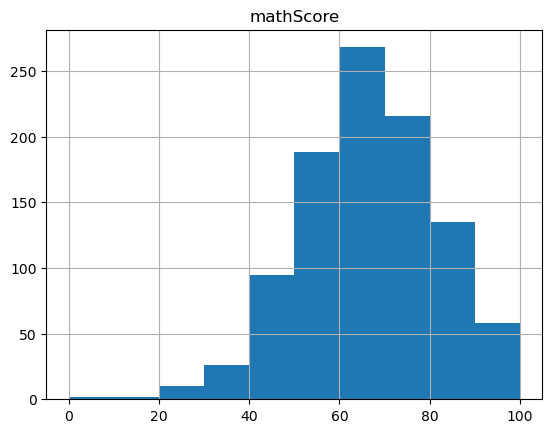

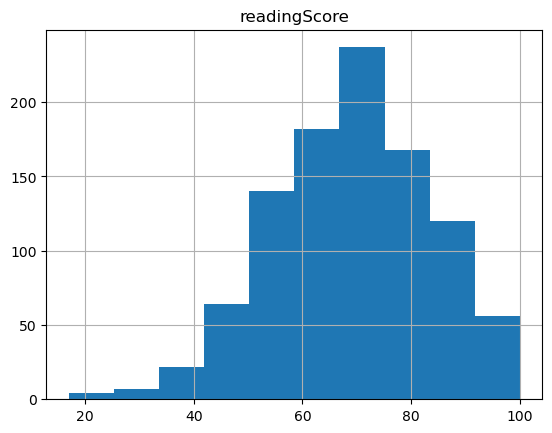

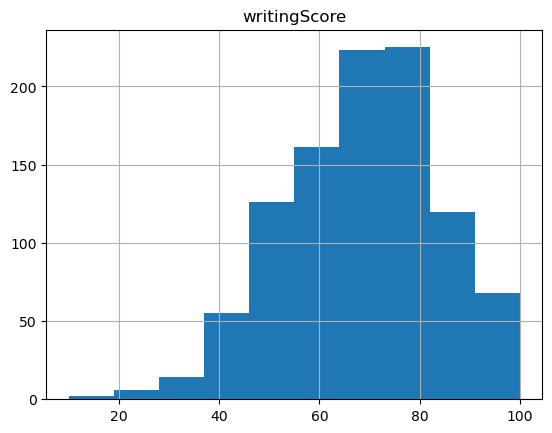

In [72]:
for c in num_cols:
    df.loc[:,[c]].hist()
    plt.show()

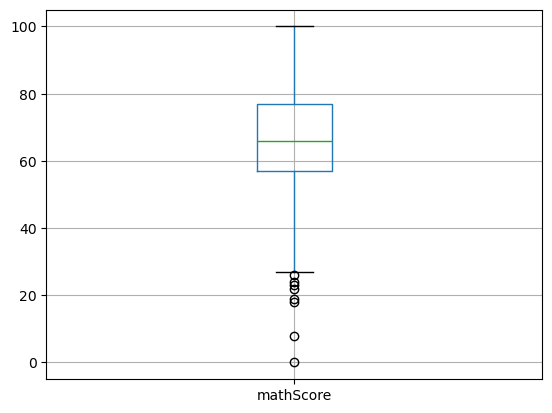

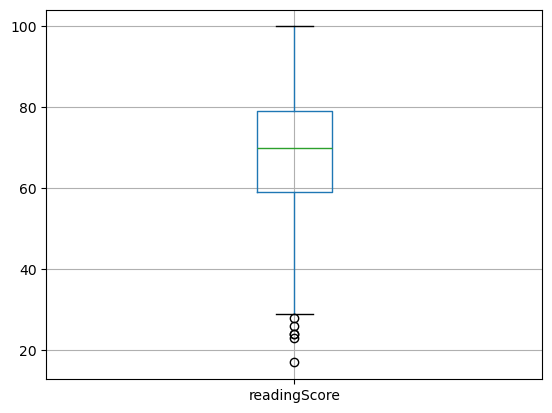

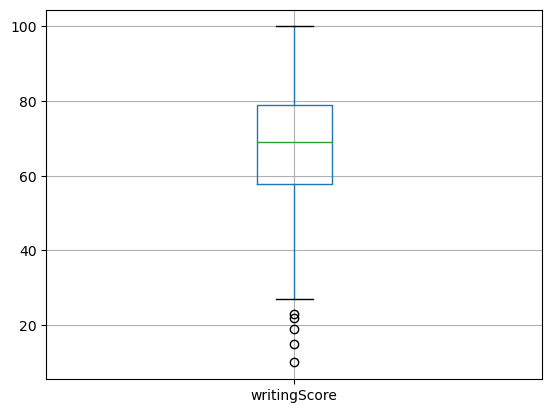

In [73]:
for c in num_cols:
    df.loc[:,[c]].boxplot()
    plt.show()

Correlacion entre variables

In [77]:
df.loc[df["lunch"] == 'free/reduced', ["mathScore"]].describe()

,mathScore
count,355.000000
mean,58.921127
std,15.159956
min,0.000000
25%,49.000000
50%,60.000000
75%,69.000000
max,100.000000


In [76]:
df.loc[df["lunch"] == 'standard', ["mathScore"]].describe()

,mathScore
count,645.000000
mean,70.034109
std,13.653501
min,19.000000
25%,61.000000
50%,69.000000
75%,80.000000
max,100.000000


Se puede observar que los estudiantes que tuvieron un almuerzo reducido o no almorzaron obtuvieron resultados menos satisfactorios en las pruebas de matematicas, a diferencia de los estudiantes que tuvieron un almuerzo normal.

La siguientes relaciones son los resultados entre los diferentes grupos mayoritarios en este experimento. La relacion entre el resultado de matematicas, el genero y el grupo etnico de los estudiantes.

Obtencion de las distribuciones probabilisticas

In [79]:
prob_freq = df.groupby(cat_cols, as_index=False).agg({
    #Se utiliza el mathScore ya que el dataset no cuenta con un userID. 
    "mathScore": ["count"]
})

prob_freq.columns = cat_cols + ["count"]

np.sum(prob_freq["count"])

1000

In [80]:
prob_freq

,gender,race,parentEducation,lunch,testPreparation,count
0,female,group A,associate's degree,free/reduced,none,3
1,female,group A,associate's degree,standard,completed,2
2,female,group A,associate's degree,standard,none,1
3,female,group A,bachelor's degree,standard,none,3
4,female,group A,high school,free/reduced,completed,3
...,...,...,...,...,...,...
206,male,group E,some college,standard,completed,4
207,male,group E,some college,standard,none,12
208,male,group E,some high school,free/reduced,completed,2
209,male,group E,some high school,standard,completed,6


In [81]:
prob_freq["freq"] = prob_freq["count"] / df.shape[0]

In [85]:
prob_freq

,gender,race,parentEducation,lunch,testPreparation,count,freq
0,female,group A,associate's degree,free/reduced,none,3,0.003
1,female,group A,associate's degree,standard,completed,2,0.002
2,female,group A,associate's degree,standard,none,1,0.001
3,female,group A,bachelor's degree,standard,none,3,0.003
4,female,group A,high school,free/reduced,completed,3,0.003
...,...,...,...,...,...,...,...
206,male,group E,some college,standard,completed,4,0.004
207,male,group E,some college,standard,none,12,0.012
208,male,group E,some high school,free/reduced,completed,2,0.002
209,male,group E,some high school,standard,completed,6,0.006


Limpiar valores atipicos

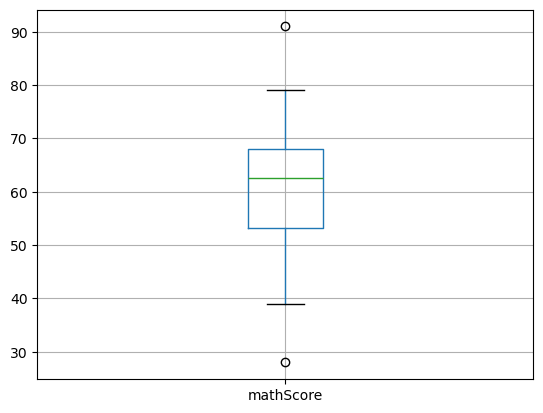

In [95]:
df.loc[(df["gender"]=='male')
       & (df["race"]=='group A')
       & (df['testPreparation']=='none'),["mathScore"]].boxplot()
plt.show()

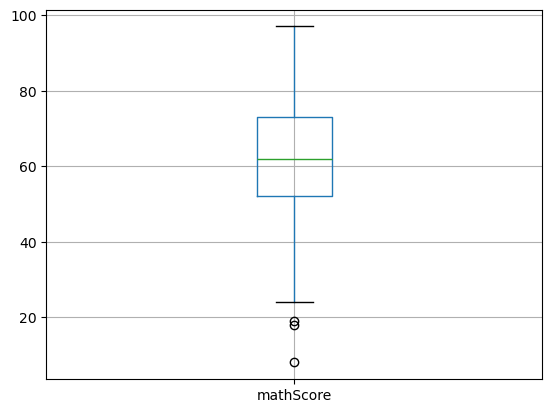

In [155]:
df.loc[(df["gender"]=='female')
       & (df["race"]=='group B')
       & (df['testPreparation']=='none'),["mathScore"]].boxplot()
plt.show()

In [99]:
def calcLowerUpperBound(df, categoricColumns, numericColumn):
    return df.groupby(categoricColumns, as_index=False).agg({
        numericColumn:[
            ('lower_bound', lambda x: x.quantile(.25) - 1.5*(x.quantile(.75) - x.quantile(.25))),
            ('upper_bound', lambda x: x.quantile(.75) + 1.5*(x.quantile(.75) - x.quantile(.25)))
        ]
    })
    
calcLowerUpperBound(df, cat_cols, 'mathScore')

gender     race     parentEducation         lunch testPreparation  \
                                                                         
0    female  group A  associate's degree  free/reduced            none   
1    female  group A  associate's degree      standard       completed   
2    female  group A  associate's degree      standard            none   
3    female  group A   bachelor's degree      standard            none   
4    female  group A         high school  free/reduced       completed   
..      ...      ...                 ...           ...             ...   
206    male  group E        some college      standard       completed   
207    male  group E        some college      standard            none   
208    male  group E    some high school  free/reduced       completed   
209    male  group E    some high school      standard       completed   
210    male  group E    some high school      standard            none   

      mathScore              
    lower_bound upper_bound  
0        18.000      74.000  
1        50.000      70.000  
2        82.000      82.000  
3        37.500      65.500  
4        11.250      97.250  
..          ...         ...  
206      75.375      96.375  
207      43.875     106.875  
208      70.500      80.500  
209      58.625     101.625  
210      33.750     127.750  

[211 rows x 7 columns]

In [100]:
transformations = {}
new_cols = []
for c in num_cols:
    transformations[c] = [
        ( 'lower_bound' , lambda x: x.quantile(.25) - 1.5*(x.quantile(.75) - x.quantile(.25))  ),
        ( 'upper_bound' , lambda x: x.quantile(.75) + 1.5*(x.quantile(.75) - x.quantile(.25))  )
    ]
    new_cols.append(f"{c}_lower_bound")
    new_cols.append(f"{c}_upper_bound")

In [111]:
df_resultados = df.groupby(cat_cols, as_index=False).agg(transformations)
df_resultados.columns = cat_cols + new_cols

df_resultados

,gender,race,parentEducation,lunch,testPreparation,mathScore_lower_bound,mathScore_upper_bound,readingScore_lower_bound,readingScore_upper_bound,writingScore_lower_bound,writingScore_upper_bound
0,female,group A,associate's degree,free/reduced,none,18.000,74.000,28.500,96.500,31.000,87.000
1,female,group A,associate's degree,standard,completed,50.000,70.000,62.500,72.500,56.000,80.000
2,female,group A,associate's degree,standard,none,82.000,82.000,93.000,93.000,93.000,93.000
3,female,group A,bachelor's degree,standard,none,37.500,65.500,36.750,82.750,43.250,81.250
4,female,group A,high school,free/reduced,completed,11.250,97.250,19.000,99.000,17.500,105.500
...,...,...,...,...,...,...,...,...,...,...,...
206,male,group E,some college,standard,completed,75.375,96.375,60.875,97.875,57.500,91.500
207,male,group E,some college,standard,none,43.875,106.875,33.750,101.750,25.375,100.375
208,male,group E,some high school,free/reduced,completed,70.500,80.500,59.000,91.000,48.500,90.500
209,male,group E,some high school,standard,completed,58.625,101.625,43.875,104.875,44.875,95.875


In [324]:
df_bound = df.merge(
    df_resultados,on=cat_cols,how="inner"
)

In [325]:
df_bound.loc[
    (df_bound["mathScore"] <= df_bound["mathScore_lower_bound"])
    |
    (df_bound["mathScore"] >= df_bound["mathScore_upper_bound"])
    ,
    cat_cols + ["mathScore","mathScore_lower_bound","mathScore_upper_bound"]
]

,gender,race,parentEducation,lunch,testPreparation,mathScore,mathScore_lower_bound,mathScore_upper_bound
14,female,group A,master's degree,standard,none,50,50.00,50.00
25,male,group A,master's degree,free/reduced,none,73,73.00,73.00
59,female,group C,some high school,free/reduced,none,0,31.50,63.50
76,male,group E,some high school,standard,none,30,33.75,127.75
91,male,group C,high school,free/reduced,none,27,47.75,69.75
...,...,...,...,...,...,...,...,...
928,male,group E,associate's degree,free/reduced,completed,46,56.00,112.00
933,male,group C,bachelor's degree,free/reduced,completed,70,70.00,70.00
943,male,group A,some high school,free/reduced,completed,61,61.00,61.00
948,male,group B,some high school,free/reduced,completed,49,49.00,49.00


In [326]:
df_bound.loc[
    (df_bound["mathScore"] > df_bound["mathScore_lower_bound"])
    &
    (df_bound["mathScore"] < df_bound["mathScore_upper_bound"])
    ,
    :
]

,gender,race,parentEducation,lunch,testPreparation,mathScore,readingScore,writingScore,mathScore_lower_bound,mathScore_upper_bound,readingScore_lower_bound,readingScore_upper_bound,writingScore_lower_bound,writingScore_upper_bound
0,female,group B,bachelor's degree,standard,none,72,72,74,44.875,91.875,51.75,105.75,54.125,99.125
1,female,group C,some college,standard,completed,69,90,88,48.500,100.500,64.50,104.50,63.000,107.000
2,female,group B,master's degree,standard,none,90,95,93,70.500,96.500,87.50,97.50,79.500,97.500
3,male,group A,associate's degree,free/reduced,none,47,57,44,39.500,69.500,55.00,63.00,38.500,60.500
4,male,group C,some college,standard,none,76,78,75,38.000,94.000,11.50,111.50,3.000,107.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,85.000,97.000,99.00,99.00,92.500,102.500
996,male,group C,high school,free/reduced,none,62,55,55,47.750,69.750,39.75,77.75,44.500,64.500
997,female,group C,high school,free/reduced,completed,59,71,65,41.750,75.750,58.75,84.75,49.500,89.500
998,female,group D,some college,standard,completed,68,78,77,58.000,94.000,66.25,96.25,59.750,113.750


In [122]:
df.loc[(df["gender"]=='male')
       & (df["race"]=='group A')
       & (df['testPreparation']=='none')
       & (df["lunch"]=='free/reduced')
       & (df['parentEducation']=='master\'s degree'),:]

,gender,race,parentEducation,lunch,testPreparation,mathScore,readingScore,writingScore
25,male,group A,master's degree,free/reduced,none,73,74,72


In [327]:
def limpiarAtipicos(df,numericColumns):
    for c in numericColumns:
        print(df.shape[0])
        df = df.loc[ (df[c] > df[f"{c}_lower_bound"]) & (df[c] < df[f"{c}_upper_bound"]) , : ]

    return df
        

Antes de limpiar los valores atipicos de df_bound

In [328]:
df_bound.shape

(1000, 14)

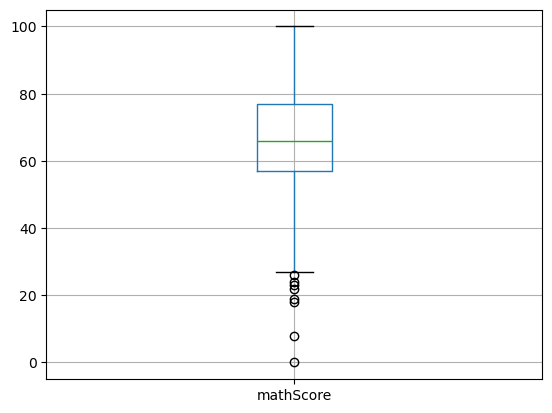

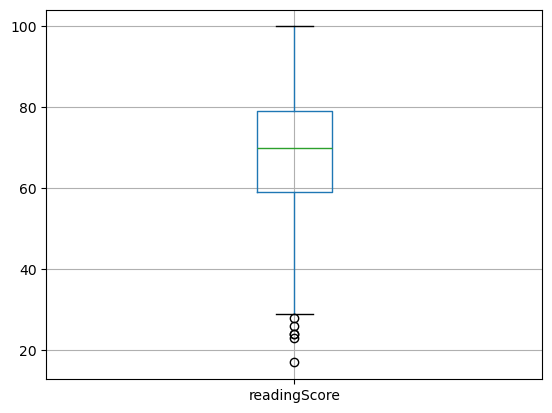

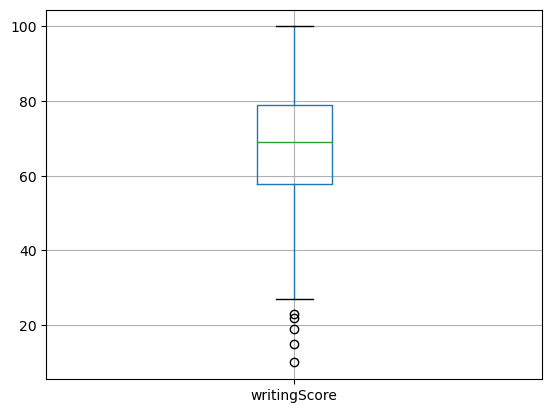

In [140]:
for c in num_cols:
    df_bound.loc[:,[c]].boxplot()
    plt.show()

Despues de limpiar los valores atipicos de df_bound

In [329]:
df_bound = limpiarAtipicos(df_bound, num_cols)

1000
938
908


In [330]:
df_bound.shape

(896, 14)

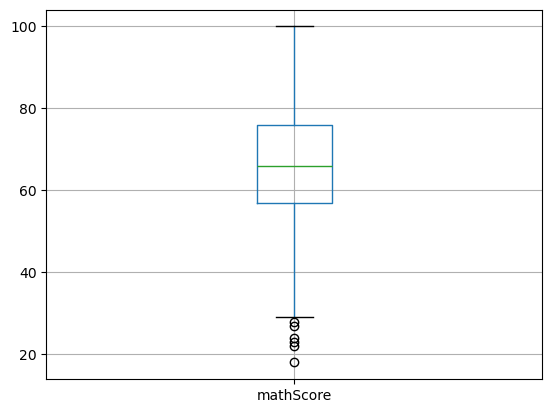

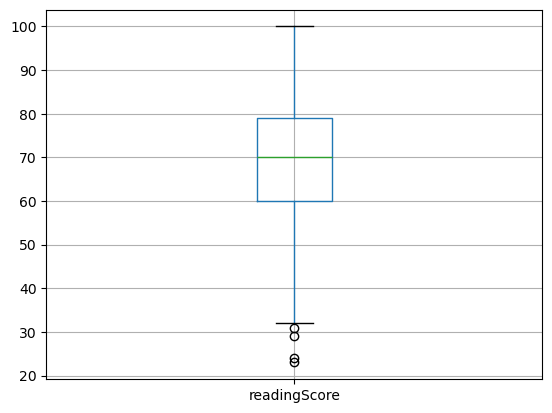

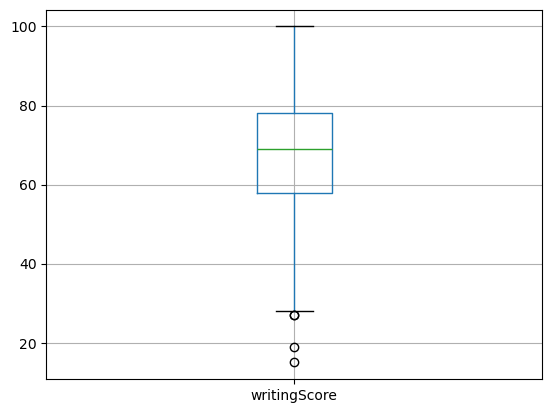

In [332]:
for c in num_cols:
    df_bound.loc[:,[c]].boxplot()
    plt.show()

In [333]:
1 - 896/1000

0.10399999999999998

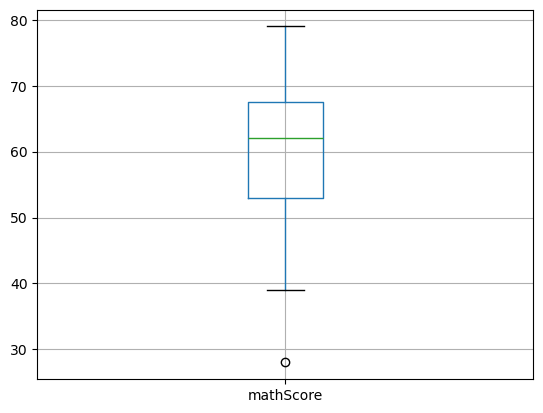

In [334]:
df_bound.loc[(df["gender"]=='male')
       & (df_bound["race"]=='group A')
       & (df_bound['testPreparation']=='none'),["mathScore"]].boxplot()
plt.show()

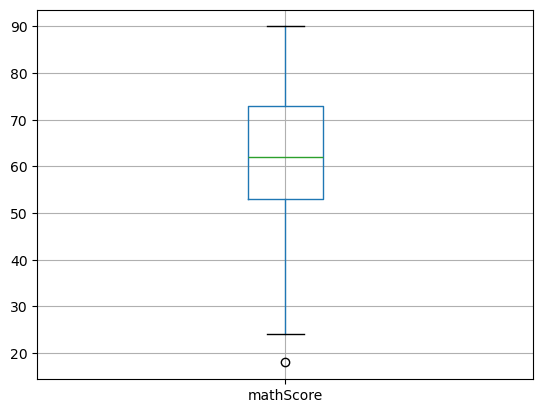

In [335]:
df_bound.loc[(df_bound["gender"]=='female')
       & (df_bound["race"]=='group B')
       & (df_bound['testPreparation']=='none'),["mathScore"]].boxplot()
plt.show()

In [336]:
df_clean = df_bound.loc[:,cat_cols+num_cols]

Resumenes Estadisticos

In [337]:
df_clean.groupby(
    cat_cols, as_index=False
).agg({
    'mathScore':["min","max","mean","std"]
})

gender     race     parentEducation         lunch testPreparation  \
                                                                         
0    female  group A  associate's degree  free/reduced            none   
1    female  group A  associate's degree      standard       completed   
2    female  group A   bachelor's degree      standard            none   
3    female  group A         high school  free/reduced       completed   
4    female  group A         high school      standard       completed   
..      ...      ...                 ...           ...             ...   
174    male  group E        some college      standard       completed   
175    male  group E        some college      standard            none   
176    male  group E    some high school  free/reduced       completed   
177    male  group E    some high school      standard       completed   
178    male  group E    some high school      standard            none   

    mathScore                            
          min max       mean        std  
0          37  65  47.666667  15.143756  
1          55  65  60.000000   7.071068  
2          45  59  51.666667   7.023769  
3          34  77  54.666667  21.548395  
4          68  75  71.500000   4.949747  
..        ...  ..        ...        ...  
174        81  85  83.333333   2.081666  
175        53  97  73.750000  12.388594  
176        73  78  75.500000   3.535534  
177        68  89  79.333333   7.966597  
178        82  94  89.333333   6.429101  

[179 rows x 9 columns]

In [338]:
summ_aggregations = {}
cols_summ = []
for c in num_cols:
    summ_aggregations[c] = ["min","max","mean","std"]
    cols_summ.append(f"{c}_min")
    cols_summ.append(f"{c}_max")
    cols_summ.append(f"{c}_mean")
    cols_summ.append(f"{c}_std")

In [339]:
df_summ = df_clean.groupby(
    cat_cols, as_index=False
).agg(summ_aggregations)

In [340]:
df_summ.columns = cat_cols + cols_summ

In [341]:
df_summ

,gender,race,parentEducation,lunch,testPreparation,mathScore_min,mathScore_max,mathScore_mean,mathScore_std,readingScore_min,readingScore_max,readingScore_mean,readingScore_std,writingScore_min,writingScore_max,writingScore_mean,writingScore_std
0,female,group A,associate's degree,free/reduced,none,37,65,47.666667,15.143756,51,85,64.333333,18.147543,48,76,60.000000,14.422205
1,female,group A,associate's degree,standard,completed,55,65,60.000000,7.071068,65,70,67.500000,3.535534,62,74,68.000000,8.485281
2,female,group A,bachelor's degree,standard,none,45,59,51.666667,7.023769,49,72,60.000000,11.532563,51,70,61.666667,9.712535
3,female,group A,high school,free/reduced,completed,34,77,54.666667,21.548395,48,88,62.000000,22.538855,41,85,62.000000,22.068076
4,female,group A,high school,standard,completed,68,75,71.500000,4.949747,80,82,81.000000,1.414214,76,79,77.500000,2.121320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,male,group E,some college,standard,completed,81,85,83.333333,2.081666,74,83,77.333333,4.932883,68,78,72.333333,5.131601
175,male,group E,some college,standard,none,53,97,73.750000,12.388594,51,87,67.750000,11.209777,43,82,63.333333,12.017664
176,male,group E,some high school,free/reduced,completed,73,78,75.500000,3.535534,67,83,75.000000,11.313708,59,80,69.500000,14.849242
177,male,group E,some high school,standard,completed,68,89,79.333333,7.966597,51,84,72.333333,12.785408,57,77,70.500000,9.354143


### Expandir el Dataset

In [342]:
prob_freq

,gender,race,parentEducation,lunch,testPreparation,count,freq
0,female,group A,associate's degree,free/reduced,none,3,0.003
1,female,group A,associate's degree,standard,completed,2,0.002
2,female,group A,associate's degree,standard,none,1,0.001
3,female,group A,bachelor's degree,standard,none,3,0.003
4,female,group A,high school,free/reduced,completed,3,0.003
...,...,...,...,...,...,...,...
206,male,group E,some college,standard,completed,4,0.004
207,male,group E,some college,standard,none,12,0.012
208,male,group E,some high school,free/reduced,completed,2,0.002
209,male,group E,some high school,standard,completed,6,0.006


In [281]:
cant_expnd = 10000

In [343]:
ids = np.random.choice(prob_freq.index,size=cant_expnd,p=prob_freq["freq"].to_list())

In [344]:
len(ids[ids==0])

31

In [345]:
len(ids)

10000

In [346]:
len(ids[ids==0])/len(ids)

0.0031

In [347]:
def trunc_vector(min_val, max_val, media, desv_std,size):
    a,b = (min_val - media) / desv_std, (max_val - media) / desv_std
    muestras = truncnorm.rvs(a,b,loc=media,scale=desv_std,size=size)

    return muestras

In [348]:
df_summ

,gender,race,parentEducation,lunch,testPreparation,mathScore_min,mathScore_max,mathScore_mean,mathScore_std,readingScore_min,readingScore_max,readingScore_mean,readingScore_std,writingScore_min,writingScore_max,writingScore_mean,writingScore_std
0,female,group A,associate's degree,free/reduced,none,37,65,47.666667,15.143756,51,85,64.333333,18.147543,48,76,60.000000,14.422205
1,female,group A,associate's degree,standard,completed,55,65,60.000000,7.071068,65,70,67.500000,3.535534,62,74,68.000000,8.485281
2,female,group A,bachelor's degree,standard,none,45,59,51.666667,7.023769,49,72,60.000000,11.532563,51,70,61.666667,9.712535
3,female,group A,high school,free/reduced,completed,34,77,54.666667,21.548395,48,88,62.000000,22.538855,41,85,62.000000,22.068076
4,female,group A,high school,standard,completed,68,75,71.500000,4.949747,80,82,81.000000,1.414214,76,79,77.500000,2.121320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,male,group E,some college,standard,completed,81,85,83.333333,2.081666,74,83,77.333333,4.932883,68,78,72.333333,5.131601
175,male,group E,some college,standard,none,53,97,73.750000,12.388594,51,87,67.750000,11.209777,43,82,63.333333,12.017664
176,male,group E,some high school,free/reduced,completed,73,78,75.500000,3.535534,67,83,75.000000,11.313708,59,80,69.500000,14.849242
177,male,group E,some high school,standard,completed,68,89,79.333333,7.966597,51,84,72.333333,12.785408,57,77,70.500000,9.354143


In [350]:
prob_freq_clean = df_clean.groupby(cat_cols, as_index=False).agg({
    #Se utiliza el mathScore ya que el dataset no cuenta con un userID. 
    "mathScore": ["count"]
})

prob_freq_clean.columns = cat_cols + ["count"]

prob_freq_clean["freq"] = prob_freq_clean["count"] / df_clean.shape[0]

In [351]:
df_extended = pd.DataFrame()

for i in prob_freq_clean.index:
    setting = {
        "id": ids[ids == i]
    }
    for c in num_cols:
        setting[c] = trunc_vector(
            df_summ.iloc[i][f"{c}_min"],
            df_summ.iloc[i][f"{c}_max"],
            df_summ.iloc[i][f"{c}_mean"],
            df_summ.iloc[i][f"{c}_std"],
            len(ids[ids==i])
        )
    
    tmp = pd.DataFrame(setting)
    df_extended = pd.concat([df_extended, tmp])

In [352]:
df_clean.describe()

,mathScore,readingScore,writingScore
count,896.000000,896.000000,896.000000
mean,66.242188,69.232143,68.087054
std,14.007278,13.544123,14.276645
min,18.000000,23.000000,15.000000
25%,57.000000,60.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,76.000000,79.000000,78.000000
max,100.000000,100.000000,100.000000


In [353]:
df_extended.describe()

,id,mathScore,readingScore,writingScore
count,8451.000000,8451.000000,8451.000000,8451.000000
mean,88.316767,65.989118,69.967699,69.087047
std,51.539411,12.115017,11.608263,12.319739
min,0.000000,19.010273,24.391098,15.275285
25%,43.000000,58.063793,61.908822,60.196559
50%,79.000000,66.255981,70.550136,69.745538
75%,139.000000,74.230159,78.460712,77.956590
max,178.000000,99.999551,99.896927,99.800584


In [354]:
df.loc[(df["gender"]=='male')
       & (df["race"]=='group A')
       & (df['testPreparation']=='none')
       & (df["lunch"]=='free/reduced')
       & (df['parentEducation']=='master\'s degree'),:]

,gender,race,parentEducation,lunch,testPreparation,mathScore,readingScore,writingScore
25,male,group A,master's degree,free/reduced,none,73,74,72
